работа с данными, чтение и запись csv

In [1]:
import pandas as pd

df = pd.read_csv("data/country.csv")

df.to_csv("test1.csv")

работа с даннными, основные команды

In [2]:
df.info()

print(df.describe().transpose())

cleared_df = df.drop(["Continent"], axis=1) # удаляет колонку
print(cleared_df.head())
print(cleared_df.tail())

print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")

sorted_df = cleared_df.sort_values(by="Capital")
print(sorted_df.head())
print(sorted_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country/Territory  234 non-null    object
 1   Capital            232 non-null    object
 2   Continent          234 non-null    object
dtypes: object(3)
memory usage: 5.6+ KB
                  count unique          top freq
Country/Territory   234    234  Afghanistan    1
Capital             232    232        Kabul    1
Continent           234      6       Africa   57
  Country/Territory           Capital
0       Afghanistan             Kabul
1           Albania            Tirana
2           Algeria           Algiers
3    American Samoa         Pago Pago
4           Andorra  Andorra la Vella
     Country/Territory   Capital
229  Wallis and Futuna  Mata-Utu
230     Western Sahara   El Aain
231              Yemen     Sanaa
232             Zambia    Lusaka
233           Zimbabwe    Harare

работа с данными, работа с элементами

In [3]:
print(df["Continent"]) # выводит колонку таблицы

print(df.loc[100]) # выводит данные по одному объекту таблицы(по строке)

print(df.loc[100, "Country/Territory"]) # выводит данные по конкретному столбцу конкретной строки

print(df.loc[100:200, ["Country/Territory", "Capital"]]) # выводит данные с диапозона строк по столбцам

print(df[0:3]) # просто выводит данные с с диапозона строк в таблице

print(df.iloc[0])

print(df.iloc[:, 0:2]) # так как айлок работает с индексами с помощью 3-5 мы задаем строки, которые хотим вывести, а спомощью 0-2 задаем столбцы которые хотим вывести

print(df.iloc[[3, 6], [0, 1]]) # здесь 3,4 означает также номера строк, но не диапазон. 0,1 означает номера столбцов. но также не диапазон

# лок отличается от айлока тем что позволяет создавать срезы, использует метки(названия столбцов как минимум). Айлок работает с индексами

0         Asia
1       Europe
2       Africa
3      Oceania
4       Europe
        ...   
229    Oceania
230     Africa
231       Asia
232     Africa
233     Africa
Name: Continent, Length: 234, dtype: object
Country/Territory     Ivory Coast
Capital              Yamoussoukro
Continent                  Africa
Name: 100, dtype: object
Ivory Coast
    Country/Territory       Capital
100       Ivory Coast  Yamoussoukro
101           Jamaica      Kingston
102             Japan         Tokyo
103            Jersey  Saint Helier
104            Jordan         Amman
..                ...           ...
196             Spain        Madrid
197         Sri Lanka       Colombo
198             Sudan      Khartoum
199          Suriname    Paramaribo
200            Sweden     Stockholm

[101 rows x 2 columns]
  Country/Territory  Capital Continent
0       Afghanistan    Kabul      Asia
1           Albania   Tirana    Europe
2           Algeria  Algiers    Africa
Country/Territory    Afghanistan
Capital

работа с данными - отбор и группировка

In [4]:
s_values = df["Continent"].unique() # выводит все уникальные значения по столбцу
print(s_values)

s_total = 0
for s_value in s_values:
    count = df[df["Continent"] == s_value].shape[0] # шэйп возвращаеет кортеж колва строк и колва столбцов в таблице. так как мы толлько что таблицу фильтранули, мы выводим шэйп с индексом 0(строки)
    s_total += count
    print(s_value, "count =", count)
print("Total count = ", s_total)

# print(df.groupby(["Pclass", "Survived"]).size().reset_index(name="Count")) # невозможно применить к данным таблицы

['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
Asia count = 50
Europe count = 50
Africa count = 57
Oceania count = 23
North America count = 40
South America count = 14
Total count =  234


визуализация - исходные данные 

In [5]:
data = df.copy()
data.dropna(subset=["Capital"], inplace=True) # дропна позволяет удалить строчки, с пустым значением по столбцу(сабсет) и не перезаписывать таблицу(инплэйс тру)
print(data)
data.to_csv('test2.csv')

     Country/Territory           Capital Continent
0          Afghanistan             Kabul      Asia
1              Albania            Tirana    Europe
2              Algeria           Algiers    Africa
3       American Samoa         Pago Pago   Oceania
4              Andorra  Andorra la Vella    Europe
..                 ...               ...       ...
229  Wallis and Futuna          Mata-Utu   Oceania
230     Western Sahara           El Aain    Africa
231              Yemen             Sanaa      Asia
232             Zambia            Lusaka    Africa
233           Zimbabwe            Harare    Africa

[232 rows x 3 columns]


In [7]:
dd = pd.read_csv("data/healthcare.csv")
ddata = dd[["age", "work_type", "avg_glucose_level"]].copy()

              avg_glucose_level                                         
                            min       q1     q2 median        q3     max
work_type                                                               
Govt_job                  55.27  76.6600  91.93  91.93  114.3200  266.59
Never_worked              59.99  78.4575  86.02  86.02  112.8075  161.28
Private                   55.12  77.8200  91.92  91.92  114.4600  271.74
Self-employed             55.23  76.6050  93.60  93.60  124.9900  267.61
children                  55.34  76.2550  90.22  90.22  108.7100  219.81
              avg_glucose_level                  
                        low_iqr     iqr  high_iqr
work_type                                        
Govt_job                20.1700  37.660  170.8100
Never_worked            26.9325  34.350  164.3325
Private                 22.8600  36.640  169.4200
Self-employed            4.0275  48.385  197.5675
children                27.5725  32.455  157.3925


<Axes: title={'center': 'avg_glucose_level'}, xlabel='work_type'>

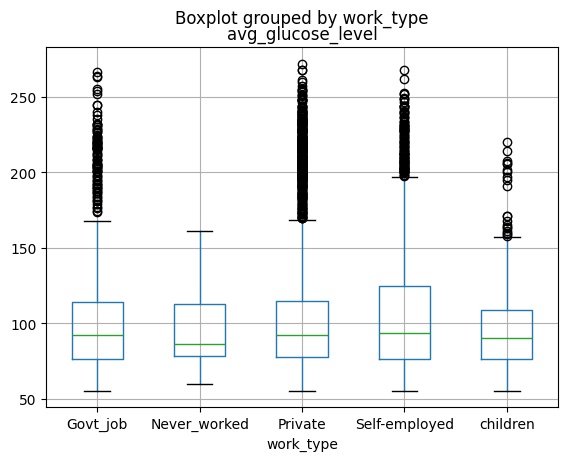

In [8]:

# функции для поиска квартилей
def q1(x):
    return x.quantile(0.25)

# median = quantile(0.5)
def q2(x):
    return x.quantile(0.5)


def q3(x):
    return x.quantile(0.75)

# интерквартильный размах
def iqr(x):
    return q3(x) - q1(x)

# нижняя граница для обнаружения выбросов(е..ть)
def low_iqr(x):
    return max(0, q1(x) - 1.5 * iqr(x))

# верхняя граница для обнаружения выбросов
def high_iqr(x):
    return q3(x) + 1.5 * iqr(x)

# aggregate позволяет выполнить все эти функции к данным каждой группы и записать их в таблицу
quantiles = ddata[["work_type", "avg_glucose_level"]].groupby(["work_type"]).aggregate(["min", q1, q2, "median", q3, "max"])
print(quantiles)

iqrs = ddata[["work_type", "avg_glucose_level"]].groupby(["work_type"]).aggregate([low_iqr, iqr, high_iqr])
print(iqrs)

ddata.boxplot(column="avg_glucose_level", by="work_type")

визуализация- гистограмма

<Axes: ylabel='Frequency'>

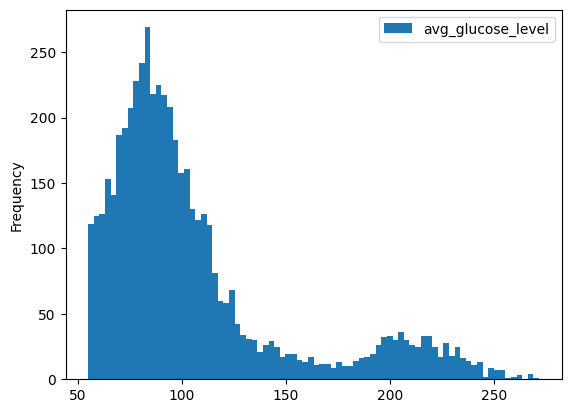

In [9]:
ddata.plot.hist(column=["avg_glucose_level"], bins=80)

Визуализация - точечная диаграмма

<Axes: xlabel='age', ylabel='work_type'>

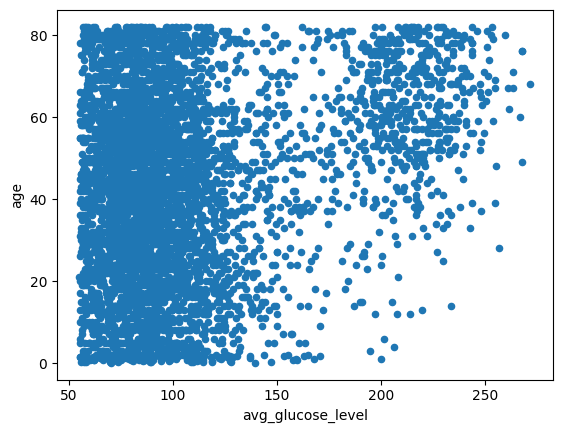

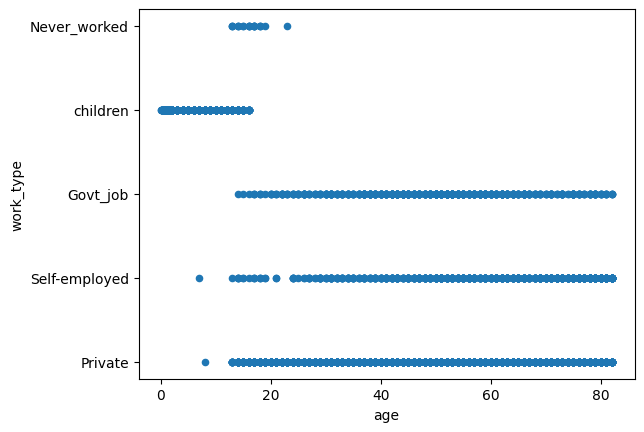

In [10]:
ddata.plot.scatter(x="avg_glucose_level", y="age")

ddata.plot.scatter(x="age", y="work_type")

столбчатая диаграмма

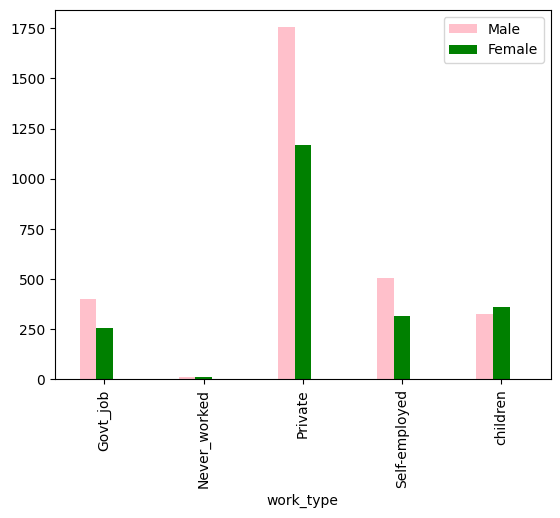

In [11]:
plot = dd.groupby(["work_type", "gender"]).size().unstack().plot.bar(color=["pink", "green"])
plot.legend(["Male", "Female"])